# Drug target discovery project

Drug discovery and developement is a time-consuming and expensive process. Usually low efficiency and high failure characterizes the production of new drugs. Consequently numerous efforts to shorten the development time and raise output have been made. Computational methods showed great results, which can additionally be attributed to the rising availability of biological macromolecule and small molecule databases. Drug target discovery is the crucial first step in drug discovery pipelines. It involves the identification and early validation of disease-modifying targets. This project comprises a computational approach to drug discovery. I'll be collecting data from the ChEMBL database, focusing my search on norepinephrine, and using machine learning models to find new targerts.

## First part:
### Data collection and pre-filtering

In [1]:
#install chembl_webresource_client -> download biological activity data
#! pip install chembl_webresource_client

In [2]:
#import libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
# Target search for norepinephrine - as we would do on the website if we typed into the search box
target = new_client.target
target_query = target.search('norepinephrine')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P23975', 'xref_name': None, 'xre...",Homo sapiens,Norepinephrine transporter,15.0,False,CHEMBL222,"[{'accession': 'P23975', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'NBK22978', 'xref_name': 'Brain n...",Mus musculus,Norepinephrine transporter,15.0,False,CHEMBL2370,"[{'accession': 'O55192', 'component_descriptio...",SINGLE PROTEIN,10090
2,"[{'xref_id': 'Q9WTR4', 'xref_name': None, 'xre...",Rattus norvegicus,Norepinephrine transporter,15.0,False,CHEMBL304,"[{'accession': 'Q9WTR4', 'component_descriptio...",SINGLE PROTEIN,10116
3,[],Rattus norvegicus,Monoamine transporters; Norepinephrine & serot...,11.0,False,CHEMBL2096672,"[{'accession': 'P31652', 'component_descriptio...",SELECTIVITY GROUP,10116
4,[],Homo sapiens,Monoamine transporters; Norepinephrine & dopamine,11.0,False,CHEMBL2096990,"[{'accession': 'Q01959', 'component_descriptio...",SELECTIVITY GROUP,9606
5,[],Homo sapiens,Serotonin and norepinephrine transporters (SER...,11.0,False,CHEMBL2111346,"[{'accession': 'P31645', 'component_descriptio...",SELECTIVITY GROUP,9606
6,[],Homo sapiens,Monoamine transporter,9.0,False,CHEMBL2363064,"[{'accession': 'P31645', 'component_descriptio...",PROTEIN FAMILY,9606


I will select human dopamine receptor D4 for further investigation, which is the 1st on the list.

In [4]:
#get the id of the target
selection = targets.target_chembl_id[0]
selection

'CHEMBL222'

#### Retrieve bioactivity data

Select uniform bioactivity unit; IC50. 

IC50 represents the potency, the lower it is the better the potency is (so we want it to be as low as possible), consequently we would need less of the drug to get the same effect.

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selection).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,391050,[],CHEMBL751372,Inhibition of [3H]norepinephrine uptake in HEK...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,173.0
1,None,391572,[],CHEMBL756262,Inhibition of NE uptake in HEK cells expressin...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,0.62
2,None,392730,[],CHEMBL752511,Inhibition of [3H]NE reuptake by human norepin...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,uM,UO_0000065,None,0.2
3,None,392740,[],CHEMBL752511,Inhibition of [3H]NE reuptake by human norepin...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,uM,UO_0000065,None,0.165
4,None,392890,[],CHEMBL756262,Inhibition of NE uptake in HEK cells expressin...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,233.0


Save file to a .csv.

In [6]:
#df.to_csv('norepinephrine_01_bioactivity_data_raw.csv', index=False)

#### Pre-filtering

* Drop rows with missing data.

In [7]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head(5)

/tmp/ipykernel_16723/801366148.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,391050,[],CHEMBL751372,Inhibition of [3H]norepinephrine uptake in HEK...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,173.0
1,None,391572,[],CHEMBL756262,Inhibition of NE uptake in HEK cells expressin...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,0.62
2,None,392730,[],CHEMBL752511,Inhibition of [3H]NE reuptake by human norepin...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,uM,UO_0000065,None,0.2
3,None,392740,[],CHEMBL752511,Inhibition of [3H]NE reuptake by human norepin...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,uM,UO_0000065,None,0.165
4,None,392890,[],CHEMBL756262,Inhibition of NE uptake in HEK cells expressin...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,233.0


* Drop duplicates.

In [8]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr = df2_nr.reset_index()
df2_nr.head(5)

,index,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,0,None,391050,[],CHEMBL751372,Inhibition of [3H]norepinephrine uptake in HEK...,B,None,None,BAO_0000190,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,173.0
1,1,None,391572,[],CHEMBL756262,Inhibition of NE uptake in HEK cells expressin...,F,None,None,BAO_0000190,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,0.62
2,2,None,392730,[],CHEMBL752511,Inhibition of [3H]NE reuptake by human norepin...,B,None,None,BAO_0000190,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,uM,UO_0000065,None,0.2
3,3,None,392740,[],CHEMBL752511,Inhibition of [3H]NE reuptake by human norepin...,B,None,None,BAO_0000190,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,uM,UO_0000065,None,0.165
4,4,None,392890,[],CHEMBL756262,Inhibition of NE uptake in HEK cells expressin...,F,None,None,BAO_0000190,...,Homo sapiens,Norepinephrine transporter,9606,None,None,IC50,nM,UO_0000065,None,233.0


#### Label data: 
- active 
- intermediate
- inactive


It will come in handy when we use the ML models, because we can classify the bioactivity data into 3 or 2 (without the intermediate part) classes.

In [9]:
#select columns
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.head(5)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL132683,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C,173.0
1,CHEMBL544370,Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21,0.62
2,CHEMBL417049,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1,200.0
3,CHEMBL26320,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1,165.0
4,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,233.0


In [10]:
#save it
#df3.to_csv('norepinephrine_02_bioactivity_data_preprocessed.csv', index=False)

In [11]:
bioactivity_labels = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_labels.append("inactive")
  elif float(i) <= 1000:
    bioactivity_labels.append("active")
  else:
    bioactivity_labels.append("intermediate")

In [12]:
bioactivity_labels = pd.Series(bioactivity_labels, name='class')
bioactivity_labels
df4 = pd.concat([df3, bioactivity_labels], axis=1)
df4.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL132683,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C,173.0,active
1,CHEMBL544370,Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21,0.62,active
2,CHEMBL417049,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1,200.0,active
3,CHEMBL26320,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1,165.0,active
4,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,233.0,active


## Part2 
### Descriptor calculation and exploratory statistics


From the data we collected we will calculate molecular descriptors and apply statistics on those descriptors.
We will only select active and inactive compounds for the statistics for easier comparison.

In [13]:
#install packages needed and import libraries
#rdkit - compute the molecular descriptors with this
#! pip install rdkit 
import sys

In [14]:
df_no_smiles = df4.drop(columns='canonical_smiles')
df_no_smiles.head(5)

,molecule_chembl_id,standard_value,class
0,CHEMBL132683,173.0,active
1,CHEMBL544370,0.62,active
2,CHEMBL417049,200.0,active
3,CHEMBL26320,165.0,active
4,CHEMBL370805,233.0,active


In [15]:
#atomic details
smiles = []

for i in df4.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [16]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles.head(5)

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL132683,173.0,active,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C
1,CHEMBL544370,0.62,active,OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21
2,CHEMBL417049,200.0,active,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1
3,CHEMBL26320,165.0,active,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1
4,CHEMBL370805,233.0,active,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...


#### Calculate Lipinski descriptors:
Rule of 5 of drug likeness - whether it can be absorbed, distributed, metabolised and excreted.


logP - solutibility


MW : molecular weight == size


smiles: atomic details of the molecule

In [17]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [18]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [19]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head(5)

,MW,LogP,NumHDonors,NumHAcceptors
0,291.347,1.8371,2.0,5.0
1,308.337,2.0746,1.0,5.0
2,442.647,5.8216,0.0,3.0
3,414.593,5.0430,0.0,3.0
4,303.358,1.8677,0.0,5.0


Combine df4 and df_lipinski.

In [20]:
#we want the standard value and lipinski values together
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined.head(5)

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL132683,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C,173.0,active,291.347,1.8371,2.0,5.0
1,CHEMBL544370,Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21,0.62,active,308.337,2.0746,1.0,5.0
2,CHEMBL417049,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1,200.0,active,442.647,5.8216,0.0,3.0
3,CHEMBL26320,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1,165.0,active,414.593,5.0430,0.0,3.0
4,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,233.0,active,303.358,1.8677,0.0,5.0


#### Convert IC50 to pIC50
Convert the standard value, we do this to even the distribution.

In [21]:
df_combined['standard_value'] = df_combined['standard_value'].astype('float')
df_combined.standard_value.describe()

count       2146.000000
mean        6923.002176
std        41005.854557
min            0.000000
25%           29.250000
50%          271.000000
75%         2129.000000
max      1000000.000000
Name: standard_value, dtype: float64

In [22]:
#max to cap at
#large value will become negative - > so we need to cap it, to make the inbterpretation easier
-np.log10( (10**-9)* 100000000 )

1.0

In [23]:
#we need to cap the minimum too
-np.log10( (10**-9)* 0.1 )

10.0

In [24]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        if i == 0:
            i = 0.1
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [25]:
df_norm = norm_value(df_combined)
df_norm.head(5)

/tmp/ipykernel_16723/2854887513.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL132683,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C,active,291.347,1.8371,2.0,5.0,173.00
1,CHEMBL544370,Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21,active,308.337,2.0746,1.0,5.0,0.62
2,CHEMBL417049,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1,active,442.647,5.8216,0.0,3.0,200.00
3,CHEMBL26320,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1,active,414.593,5.0430,0.0,3.0,165.00
4,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,active,303.358,1.8677,0.0,5.0,233.00


In [26]:
df_norm.standard_value_norm.describe()

count       2146.000000
mean        6923.002223
std        41005.854550
min            0.003000
25%           29.250000
50%          271.000000
75%         2129.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [27]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [28]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_16723/3442786292.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL132683,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C,active,291.347,1.8371,2.0,5.0,6.761954
1,CHEMBL544370,Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21,active,308.337,2.0746,1.0,5.0,9.207608
2,CHEMBL417049,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1,active,442.647,5.8216,0.0,3.0,6.698970
3,CHEMBL26320,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1,active,414.593,5.0430,0.0,3.0,6.782516
4,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,active,303.358,1.8677,0.0,5.0,6.632644
...,...,...,...,...,...,...,...,...
2141,CHEMBL4754287,CCC(=O)NC[C@@H]1CNCCO[C@H]1c1ccc(Cl)c(Cl)c1.Cl,active,331.243,2.7967,2.0,3.0,8.823909
2142,CHEMBL4791288,CC(=O)NC[C@@H]1CNCCO[C@H]1c1ccc(Cl)c(Cl)c1.Cl,active,317.216,2.4066,2.0,3.0,9.481486
2143,CHEMBL4872886,CC(C)C[C@@H](N)C(=O)Nc1ccc(-c2cnco2)c(OC(F)F)c1,inactive,339.342,3.2549,2.0,5.0,4.522879
2144,CHEMBL4098877,C[C@H]1CN(c2cc(-c3n[nH]c4ccc(OC5(C)CC5)cc34)nc...,active,379.464,3.5648,1.0,6.0,8.417937


In [29]:
df_final.pIC50.describe()

count    2146.000000
mean        6.598948
std         1.218936
min         3.000000
25%         5.671824
50%         6.567034
75%         7.533921
max        11.522879
Name: pIC50, dtype: float64

In [30]:
df_final.to_csv('df_final.csv')

In [31]:
#import seaborn and matplotlib for the visualization
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

<Figure size 100x100 with 0 Axes>

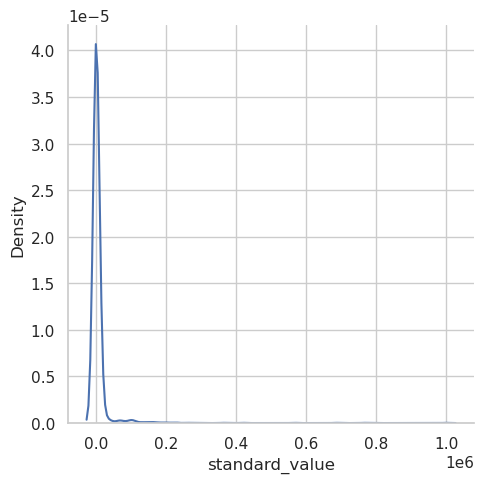

In [32]:
#distribution of IC50
plt.figure(figsize=(1, 1))

sns.displot(df_combined, x="standard_value", kind="kde")

<Figure size 100x100 with 0 Axes>

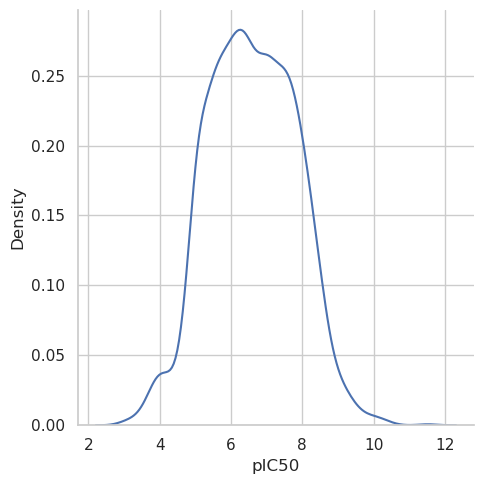

In [33]:
#distribution of pIC50
plt.figure(figsize=(1, 1))

sns.displot(df_final, x="pIC50", kind="kde")

#### Removing the 'intermediate' bioactivity class

In [34]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class = df_2class.reset_index()
df_2class.head(5)

,index,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL132683,COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C,active,291.347,1.8371,2.0,5.0,6.761954
1,1,CHEMBL544370,Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21,active,308.337,2.0746,1.0,5.0,9.207608
2,2,CHEMBL417049,CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1,active,442.647,5.8216,0.0,3.0,6.698970
3,3,CHEMBL26320,c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1,active,414.593,5.0430,0.0,3.0,6.782516
4,4,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,active,303.358,1.8677,0.0,5.0,6.632644


In [35]:
#df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

#### Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

* Frequency plot of the 2 bioactivity classes¶

Text(0, 0.5, 'Frequency')

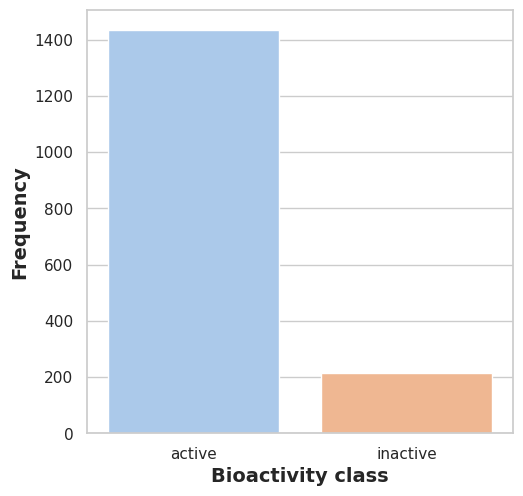

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='white', palette="pastel")


plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

#plt.savefig('plot_bioactivity_class.pdf')

* Scatter plot of MW versus LogP

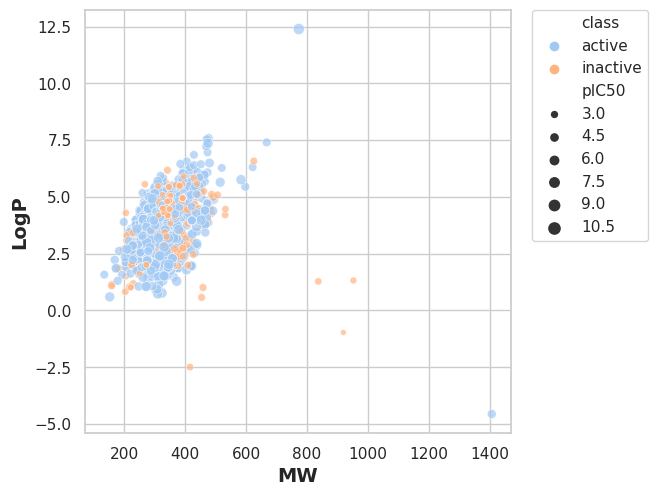

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='white', alpha=0.7, palette="pastel")

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#plt.savefig('plot_MW_vs_LogP.pdf')

* pIC50 value

Text(0, 0.5, 'pIC50 value')

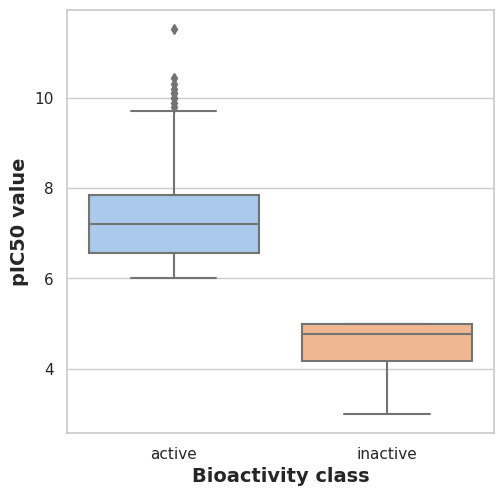

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, palette="pastel")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

#plt.savefig('plot_ic50.pdf')

#### Statistical analysis with Mann-Whitney U Test

In [39]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu

# seed the random number generator
    seed(13)

# actives and inactives
    selection = [descriptor, 'class']
    df = df_2class[selection]
    active = df[df['class'] == 'active']
    active = active[descriptor]

    selection = [descriptor, 'class']
    df = df_2class[selection]
    inactive = df[df['class'] == 'inactive']
    inactive = inactive[descriptor]

# compare samples
    stat, p = mannwhitneyu(active, inactive)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
  
    results = pd.DataFrame({'Descriptor':descriptor,
                            'Statistics':stat,
                            'p':p,
                            'alpha':alpha,
                            'Interpretation':interpretation}, index=[0])
    filename = 'mannwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)

    return results

* pIC50

In [40]:
mannwhitney('pIC50')

Statistics=308525.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,308525.0,5.858768e-124,0.05,Different distribution (reject H0)


Different distribution of the two groups when we reject the h0, which means statistically significant difference.

* MW

Text(0, 0.5, 'MW')

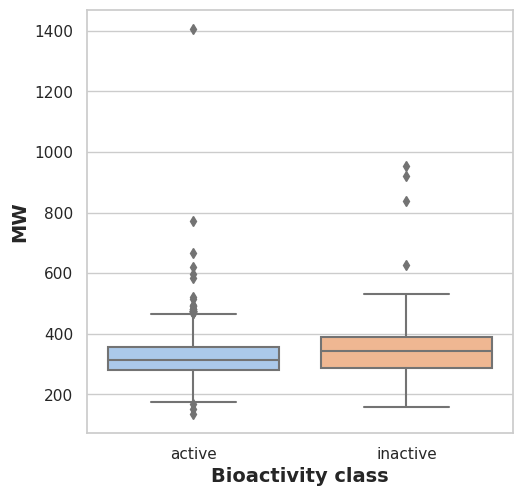

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, palette="pastel")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

#plt.savefig('plot_MW.pdf')

In [42]:
mannwhitney('MW')

Statistics=131450.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,131450.0,0.000463,0.05,Different distribution (reject H0)


* LogP

Text(0, 0.5, 'LogP')

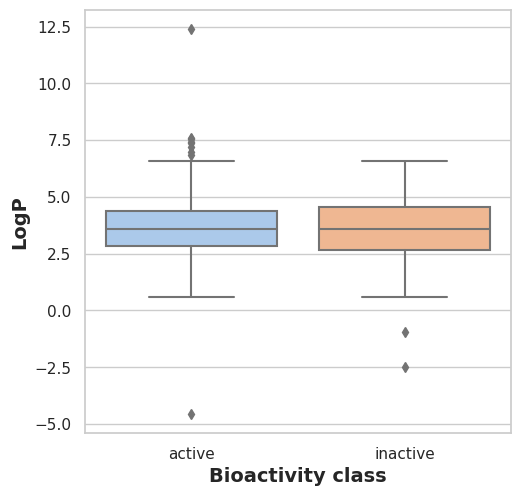

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, palette="pastel")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

#plt.savefig('plot_LogP.pdf')

In [44]:
mannwhitney('LogP')

Statistics=152711.500, p=0.812


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,152711.5,0.811895,0.05,Same distribution (fail to reject H0)


LogP shows similar distribution

* NumHDonors

Text(0, 0.5, 'NumHDonors')

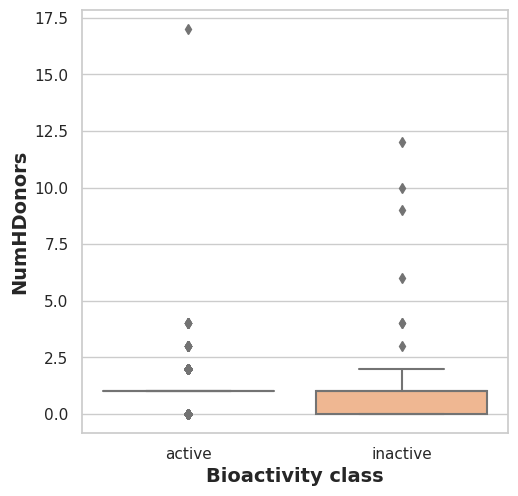

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, palette="pastel")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

#plt.savefig('plot_NumHDonors.pdf')

In [46]:
mannwhitney('NumHDonors')

Statistics=190419.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,190419.0,5.913926e-10,0.05,Different distribution (reject H0)


* NumHAcceptors

Text(0, 0.5, 'NumHAcceptors')

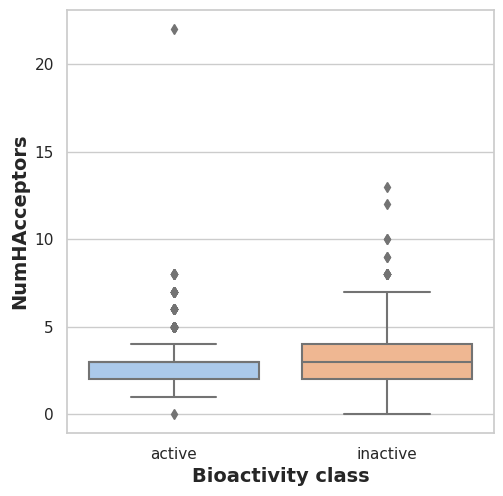

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, palette="pastel")

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

#plt.savefig('plot_NumHAcceptors.pdf')

In [48]:
mannwhitney('NumHAcceptors')

Statistics=120145.000, p=0.000


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,120145.0,4.716330e-08,0.05,Different distribution (reject H0)


#### Interpretation of Statistical Results:
* Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

* Lipinski's descriptors: 3 of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

## Part3: 
### Descriptor Calculation and Dataset Preparation



#### Download PaDEL-Descriptor

In [49]:
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
#! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [50]:
#! unzip padel.zip

I will use the data frame with the active, intermediate and inactive groups.

In [51]:
selection = ['canonical_smiles','molecule_chembl_id']
df_final_selection = df_final[selection]
df_final_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [52]:
#smiles represents the chemica structure
! cat molecule.smi | head -5

COC(=O)C1C(c2ccc(O)c(O)c2)CC2CCC1N2C	CHEMBL132683
Cl.OC1(c2ccc3c(c2)OCO3)c2ccccc2C2=NCCCN21	CHEMBL544370
CN(CCOC(c1ccccc1)c1ccccc1)C1CCN(CCCc2ccccc2)CC1	CHEMBL417049
c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1	CHEMBL26320
COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[C@H]1N2C	CHEMBL370805
cat: write error: Broken pipe


In [53]:
#the number of molecules we have - ccheck if we have all the molecules in this file
! cat molecule.smi | wc -l

2146


#### Calculate PaDEL descriptors

- molecular descriptor: transformed chemical information encoded as a number

In [54]:
#info
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [55]:
#calculate
! bash padel.sh

Processing CHEMBL132683 in molecule.smi (1/2146). 
Processing CHEMBL544370 in molecule.smi (2/2146). 
Processing CHEMBL417049 in molecule.smi (3/2146). 
Processing CHEMBL26320 in molecule.smi (4/2146). 
Processing CHEMBL370805 in molecule.smi (5/2146). 
Processing CHEMBL336100 in molecule.smi (6/2146). 
Processing CHEMBL781 in molecule.smi (7/2146). 
Processing CHEMBL67024 in molecule.smi (8/2146). 
Processing CHEMBL130668 in molecule.smi (9/2146). Average speed: 2.65 s/mol.
Processing CHEMBL443797 in molecule.smi (10/2146). Average speed: 1.35 s/mol.
Processing CHEMBL336940 in molecule.smi (12/2146). Average speed: 0.91 s/mol.
Processing CHEMBL421867 in molecule.smi (11/2146). Average speed: 0.91 s/mol.
Processing CHEMBL66112 in molecule.smi (13/2146). Average speed: 0.69 s/mol.
Processing CHEMBL133043 in molecule.smi (14/2146). Average speed: 0.51 s/mol.
Processing CHEMBL133902 in molecule.smi (15/2146). Average speed: 0.45 s/mol.
Processing CHEMBL63703 in molecule.smi (16/2146). Ave

Preparing the X and Y Data Matrices

In [56]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL370805,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL132683,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL544370,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL781,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL336100,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,CHEMBL4791288,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2142,CHEMBL4754287,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2143,CHEMBL4872886,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2144,CHEMBL4098877,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2142,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2143,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2144,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df3_Y = df_final['pIC50']
df3_Y

0       6.761954
1       9.207608
2       6.698970
3       6.782516
4       6.632644
          ...   
2141    8.823909
2142    9.481486
2143    4.522879
2144    8.417937
2145    8.481486
Name: pIC50, Length: 2146, dtype: float64

In [59]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3.head(5)

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.761954
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.207608
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.698970
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.782516
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.632644


## Part4

### Regression Models with Random Forest:
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.
A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees. 
It usually performs great on many problems, including features with non-linear relationships. Disadvantages, however, include the following: there is no interpretability, overfitting may easily occur, we must choose the number of trees to include in the model.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Input features

In [61]:
#input features: unique fingerprints -> machine learning will learn from this -> we want to see a group of molecules based on the fingerprints that are great targets for the drug discovery
df3_X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Target variable

In [62]:
#target variable - pIC50
df3_Y.head()

0    6.761954
1    9.207608
2    6.698970
3    6.782516
4    6.632644
Name: pIC50, dtype: float64

In [63]:
#data dimension
df3_X.shape

(2146, 881)

In [64]:
df3_Y.shape

(2146,)

Remove low variance features

In [65]:
#Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
df3_X = selection.fit_transform(df3_X)

In [66]:
df3_X.shape

(2146, 120)

#### Data split (80/20 ratio):
The importance of the training and test split is that the training set contains known output from which the model learns off of. The test set then tests the model’s predictions based on what it learned from the training set.

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(df3_X, df3_Y, test_size=0.2)

In [68]:
X_train.shape, Y_train.shape

((1716, 120), (1716,))

In [69]:
X_test.shape, Y_test.shape

((430, 120), (430,))

#### Build the regression model:
The parameter n_estimators creates n number of trees in your random forest, where n is the number you pass in.

In [70]:
np.random.seed(13) #to get the same results

model = RandomForestRegressor(n_estimators=100)

The .fit() function allows us to train the model, adjusting weights according to the data values in order to achieve better accuracy. 

In [71]:
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.30329761463243576

In [72]:
Y_pred = model.predict(X_test)
Y_pred

array([5.62876687, 6.25416748, 6.4824677 , 6.69994169, 8.5953922 ,
       7.35799485, 5.95899945, 6.81014018, 6.1641508 , 6.96820167,
       6.37798956, 7.01123523, 5.57640187, 5.4958994 , 7.26529043,
       7.24690516, 6.58653854, 7.55110846, 7.36633047, 6.9991332 ,
       6.07432361, 5.72410114, 5.8997034 , 5.83935713, 5.67572473,
       6.8687303 , 6.97479911, 5.0108517 , 7.37041702, 5.94432742,
       4.84460024, 6.51290637, 6.13197311, 6.21538565, 6.35165723,
       6.52371361, 6.52314416, 5.51143773, 6.54239675, 5.45116588,
       6.58601731, 7.15907937, 7.03555567, 5.75993687, 6.58243973,
       5.01799623, 3.93957933, 7.09092956, 6.88053207, 7.22405546,
       6.81015251, 5.653237  , 3.75805413, 6.14865432, 8.27715422,
       6.17458447, 5.28809242, 7.37944483, 7.07176459, 5.15087884,
       8.23105708, 7.73880845, 7.4510679 , 6.60828343, 6.62761152,
       6.30609103, 7.5547267 , 7.26579716, 5.76032705, 8.39549612,
       7.18471063, 6.52564275, 6.62317276, 6.10470518, 8.36689

Scatter plot of experimental and predicted values

<function matplotlib.pyplot.show(close=None, block=None)>

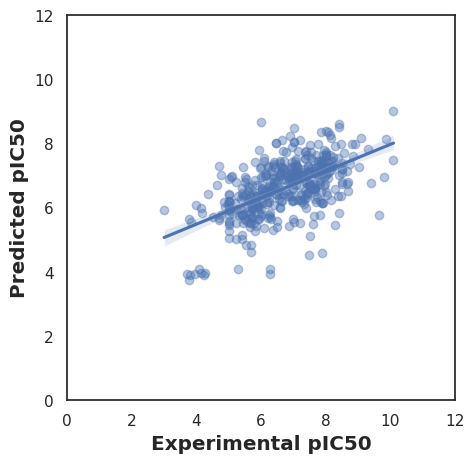

In [73]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

## Part5 : 
### Comparing several ML algorithms



In [74]:
#! pip install lazypredict

In [75]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [76]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None) #classifier variable
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [01:40<00:00,  2.39s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [01:38<00:00,  2.34s/it]


In [77]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.80,0.81,0.52,0.03
ExtraTreeRegressor,0.80,0.81,0.52,0.04
ExtraTreesRegressor,0.80,0.81,0.52,1.98
GaussianProcessRegressor,0.80,0.81,0.52,0.56
XGBRegressor,0.79,0.80,0.54,0.27
RandomForestRegressor,0.75,0.77,0.58,1.23
BaggingRegressor,0.73,0.75,0.61,0.17
MLPRegressor,0.69,0.71,0.66,1.56
HistGradientBoostingRegressor,0.64,0.66,0.71,1.33


In [78]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,0.10,0.35,0.97,0.21
SVR,0.08,0.34,0.98,0.34
HistGradientBoostingRegressor,0.07,0.33,0.99,0.52
KNeighborsRegressor,0.06,0.32,0.99,0.03
GradientBoostingRegressor,0.06,0.32,1.00,0.49
LGBMRegressor,0.05,0.32,1.00,0.11
BaggingRegressor,0.02,0.30,1.01,0.16
RandomForestRegressor,0.02,0.30,1.01,1.23
MLPRegressor,0.01,0.29,1.02,1.42


#### Data visualization of model performance

[(0.0, 1.0)]

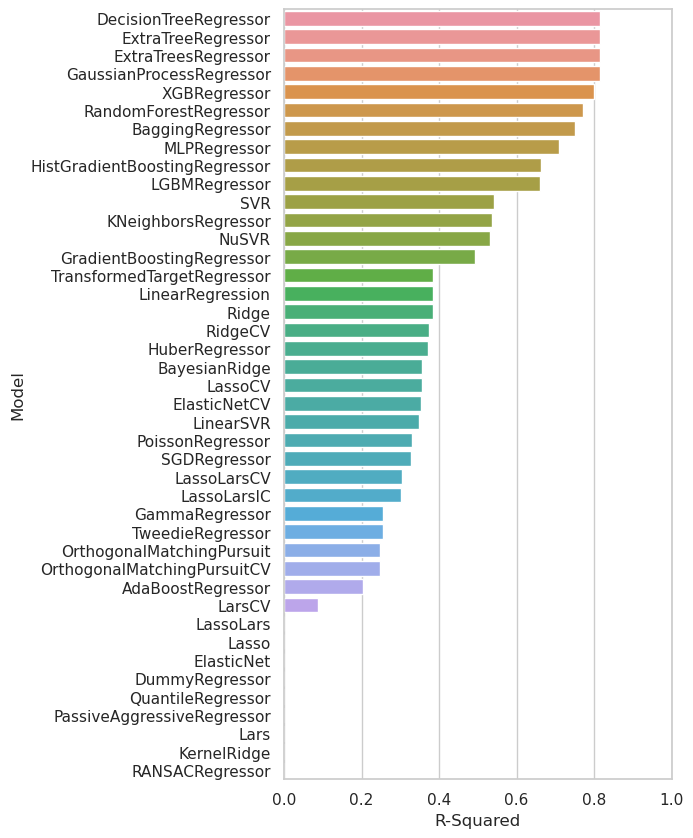

In [79]:
#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

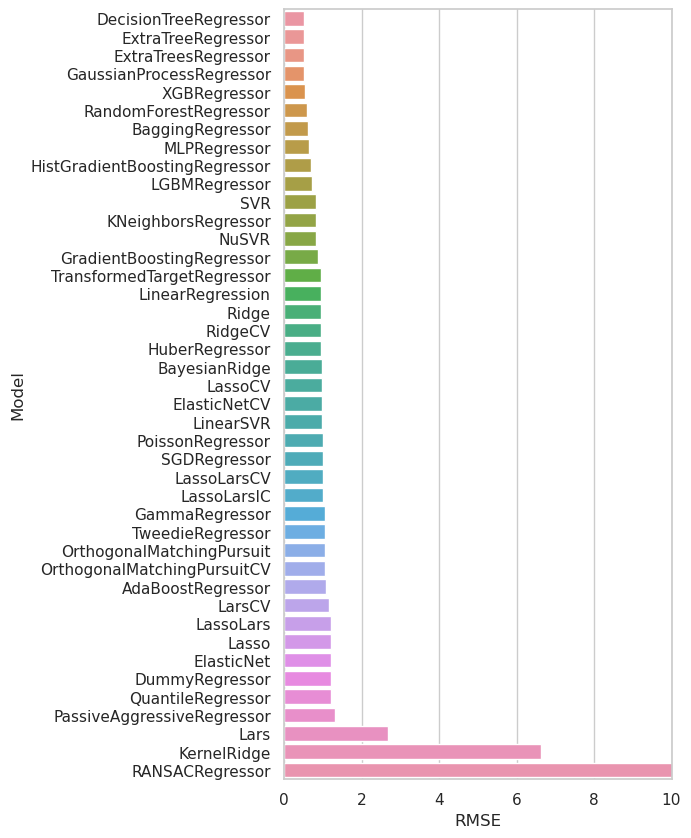

In [80]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

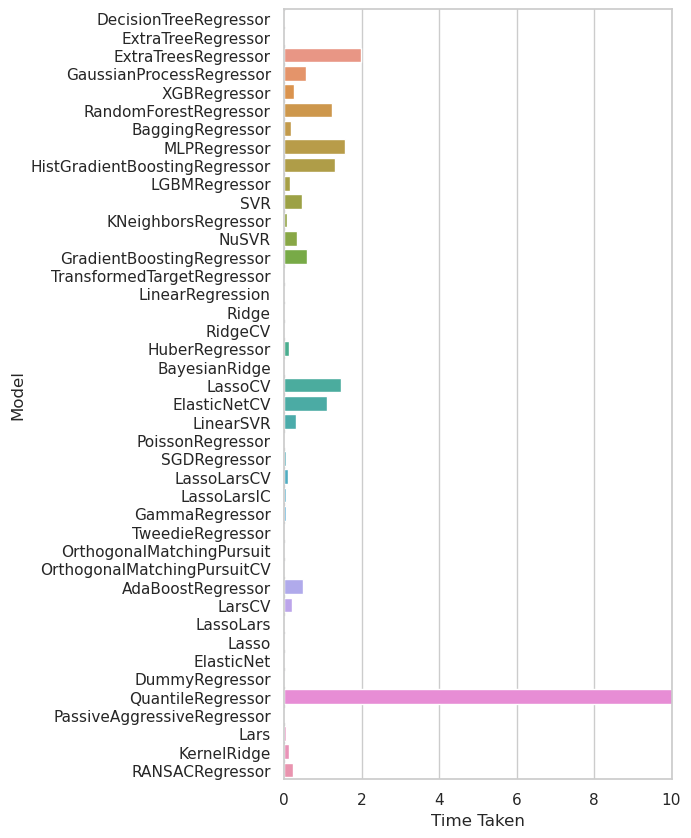

In [81]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

Decision tree regressor shows the best output metrics.